In [3]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv(r"G:\SS\Handwritten-Text-Recognition-using-Machine-Learning\Handwritten Text Recognition\Handwritten Character Recognition\A_Z Handwritten Data.csv").astype('float32')

In [6]:
X = data.drop('0',axis = 1)
y = data['0']

In [10]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

In [8]:
from keras.models import load_model
predModel = load_model("model_hand.h5")

In [12]:
pred = predModel.predict(test_x)

2328/2328 [==============================] - 13s 5ms/step


In [43]:
np.shape(test_y)

(74490,)

In [45]:
test_y = np.array(test_y)

In [46]:
test_y

array([11., 14.,  6., ..., 18., 14.,  2.], dtype=float32)

In [47]:
predResult = []
for i in range(len(pred)):
    predResult.append(np.argmax(pred[i]))
np.array(predResult)

array([11, 14,  6, ..., 18, 14,  2], dtype=int64)

In [58]:
realResult = []

for i in range(len(test_y)):
    realResult.append(test_y[i])
realResult = np.int64(realResult)

In [59]:
from sklearn.metrics import confusion_matrix


confusion_matrix = metrics.confusion_matrix(realResult, predResult)

In [60]:
print(confusion_matrix)

[[ 2791     0     0     1     0     1     0     9     0     0     0     1
      0     1     0     2     0     3     0     0     0     0     0     0
      0     0]
 [    1  1703     1     2     1     0     3     0     0     0     0     0
      0     0     9     2     0     8     6     0     0     0     0     0
      0     2]
 [    1     0  4600     0    12     0     0     1     0     2     0     8
      0     2     1     3     0     1     0     3     8     0     0     0
      0     0]
 [    3    40     0  1801     1     0     0     0     0    14     0     0
      0     2   146    38     1     0     9     0     3     0     0     0
      1     0]
 [    1     2    24     0  2224    13     2     1     0     1     0     1
      0     0     0     2     0     1     1     0     0     0     0     0
      0     4]
 [    0     0     0     0     3   241     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [    2     5    16   

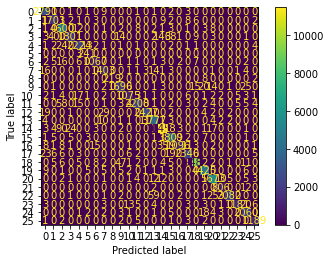

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
disp.plot()

In [65]:
from sklearn import metrics
metrics.f1_score(y_true=realResult ,y_pred=predResult, average='micro')

0.977795677272117